In [3]:
import cv2
import numpy as np
import face_recognition
import os
from sklearn.cluster import DBSCAN
from collections import defaultdict
import matplotlib.pyplot as plt

In [4]:
def load_images_from_folder(folder):
    images = []
    images_path = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if img_path.endswith(('.png', '.JPG', '.jpeg')):  # check for valid file types
            # print(img_path)
            img = face_recognition.load_image_file(img_path)
            images.append(img)
            images_path.append(img_path)
    return images, images_path

In [5]:
def extract_faces(images):
    face_encodings = []
    face_locations = []
    for img in images:
        # Assuming each image has one face for simplicity
        loc = face_recognition.face_locations(img)
        # If no faces are found, face_encodings returns an empty list
        if loc:
            encoding = face_recognition.face_encodings(img, known_face_locations=loc)[0]
            face_encodings.append(encoding)
            face_locations.append(loc[0])  # take the first face found
    return face_encodings, face_locations

In [6]:
def cluster_faces(face_encodings):
    # Using DBSCAN because it does not require to specify number of clusters in advance
    clustering_model = DBSCAN(eps=0.5, min_samples=3, metric='euclidean')
    clustering_model.fit(face_encodings)
    labels = clustering_model.labels_
    return labels

In [7]:
def main(folder_path):
    images, images_path = load_images_from_folder(folder_path)
    face_encodings, face_locations = extract_faces(images)
    
    if not face_encodings:
        print("No faces found in the folder")
        # Instead of just returning None, return a dummy function that does nothing or
        # handles the situation appropriately when called
        def dummy_function(face_id):
            print("No faces were found during the initial processing.")
        return dummy_function
    
    labels = cluster_faces(face_encodings)
    
    # Group images by detected face
    images_by_face = defaultdict(list)
    for label, img_path in zip(labels, images_path):
        images_by_face[label].append(img_path)

    # Function to show images of a given face
    def show_images_for_face(face_id):
        plt.figure(figsize=(20,10))
        paths = images_by_face[face_id]
        for i, path in enumerate(paths):
            plt.subplot(1, len(paths), i+1)
            img = plt.imread(path)
            plt.imshow(img)
            plt.axis('off')
        plt.show()

    return show_images_for_face

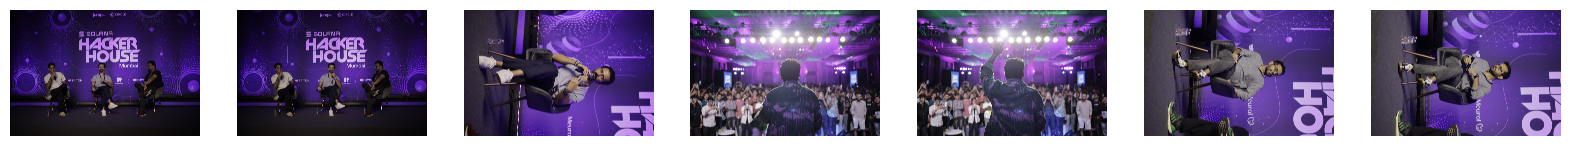

In [9]:
folder_path = 'pics' # Replace with your folder path
show_images_for_face = main(folder_path)

# To show images for a given face ID, call the function returned from main
# For example, to show images for the first face cluster:
show_images_for_face(0)

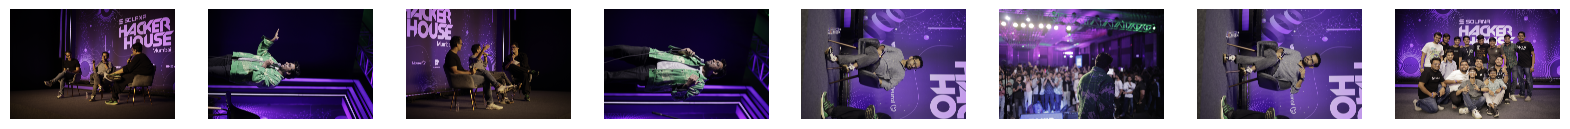

In [10]:
show_images_for_face(1)

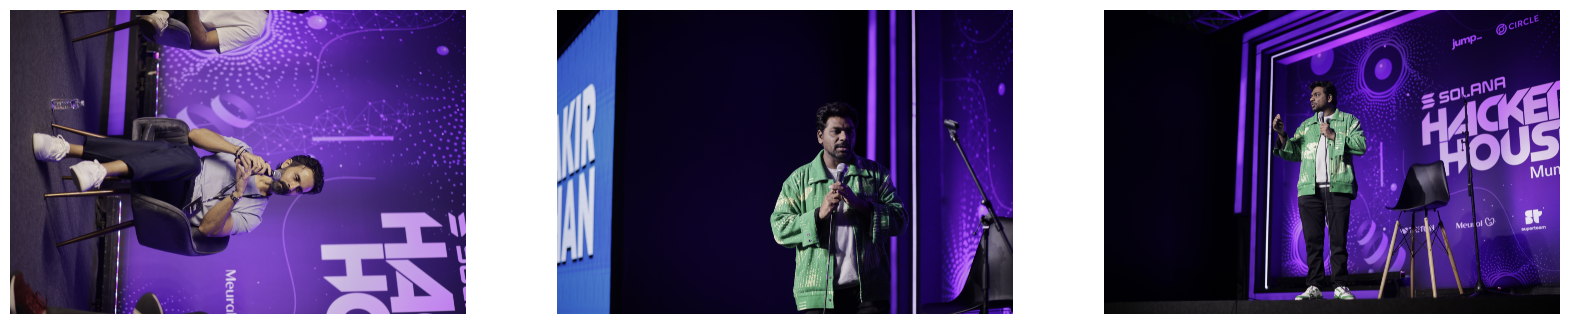

In [11]:
show_images_for_face(2)

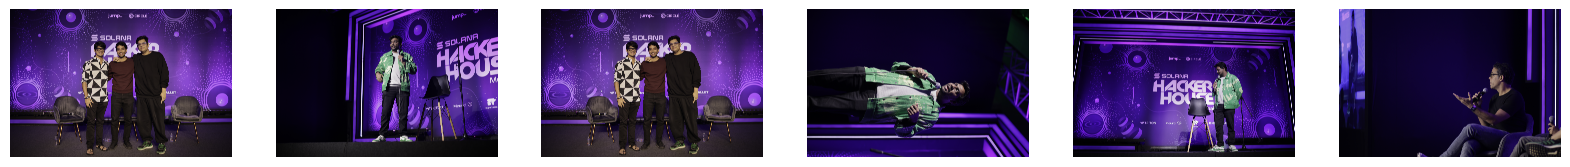

In [13]:
show_images_for_face(4)